In [1]:
!pip install lingam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 849.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=201226448f6c9834976354ae5837262c2c031f3282b6325fa509cd4df027d810
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import mannwhitneyu
import networkx as nx
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from lingam import DirectLiNGAM

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataset_pacmann/Data Carrard et al. 2022 MedTeach.csv')

In [5]:
df

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [6]:
#menghapus kolom 'id'
df = df.drop(columns='id', axis=1)


In [7]:
df.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [8]:
print(df.dtypes)

age            int64
year           int64
sex            int64
glang          int64
part           int64
job            int64
stud_h         int64
health         int64
psyt           int64
jspe           int64
qcae_cog       int64
qcae_aff       int64
amsp           int64
erec_mean    float64
cesd           int64
stai_t         int64
mbi_ex         int64
mbi_cy         int64
mbi_ea         int64
dtype: object


| Column | Name | Description |
|---|---|---|
| age | Age of the participant | Numeric |
| year | Year of study of the participant | 1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6=Mmed3 |
| sex | Gender of the participant | 1=Man; 2=Woman; 3=Non-binary |
| glang | Language spoken by the participant | 1=French; 15=German; 20=English; 37=Arab; 51=Basque; 52=Bulgarian; 53=Catalan; 54=Chinese; 59=Korean; 60=Croatian; 62=Danish; 63=Spanish; 82=Estonian; 83=Finnish; 84=Galician; 85=Greek; 86=Hebrew; 87=Hindi; 88=Hungarian; 89=Indonesian; 90=Italian; 92=Japanese; 93=Kazakh; 94=Latvian; 95=Lithuanian; 96=Malay; 98=Dutch; 100=Norwegian; 101=Polish; 102=Portuguese; 104=Romanian; 106=Russian; 108=Serbian; 112=Slovak; 113=Slovenian; 114=Swedish; 116=Czech; 117=Thai; 118=Turkish; 119=Ukrainian; 120=Vietnamese; 121=Other |
| job | Job of the participant | 0=No; 1=Yes |
| stud_h | Hours of study per week of the participant | Numeric |
| health | Self-reported health status of the participant | 1=Verydissatisfied; 2=Dissatisfied; 3=Neithersatisfiednordissatisfied; 4=Satisfied; 5=Verysatisfied |
| psyt | Psychological distress score of the participant | 0=No; 1=Yes |
| jspe | Job satisfaction score of the participant | Numeric |
| qcae_cog | Cognitive empathy score of the participant | Numeric |
| qcae_aff | Affective empathy score of the participant | Numeric |
| amsp | Academic motivation score of the participant | Numeric |
| erec_mean | Empathy rating score mean of the participant | Numeric |
| cesd | Center for Epidemiologic Studies Depression scale of the participant | Numeric |
| stai_t | State-Trait Anxiety Inventory scale of the participant | Numeric |
| mbi_ex | Maslach Burnout Inventory-Exhaustion scale of the participant | Numeric |
| mbi_cy | Maslach Burnout Inventory - Cynicism Scale of the participant | Numeric |
| mbi_ea | Maslach Burnout Inventory - Professional Efficacy Scale of the participant | Numeric |


In [9]:
#Memeriksa nilai yang hilang
df.isnull().sum()

,0
age,0
year,0
sex,0
glang,0
part,0
job,0
stud_h,0
health,0
psyt,0
jspe,0


In [10]:
# 1. Convert categorical variables to categorical types
# Categorical: year, sex, glang, health
df['year'] = df['year'].astype('category')
df['sex'] = df['sex'].astype('category')
df['glang'] = df['glang'].astype('category')
df['health'] = df['health'].astype('category')

In [11]:
df.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [12]:
print(df.dtypes)

age             int64
year         category
sex          category
glang        category
part            int64
job             int64
stud_h          int64
health       category
psyt            int64
jspe            int64
qcae_cog        int64
qcae_aff        int64
amsp            int64
erec_mean     float64
cesd            int64
stai_t          int64
mbi_ex          int64
mbi_cy          int64
mbi_ea          int64
dtype: object


In [13]:
# Misalkan DataFrame Anda bernama 'df'
jumlah_baris = df.shape[0]
print("Jumlah baris:", jumlah_baris)

Jumlah baris: 886


In [14]:
### Step 1: Data Cleansing and Preprocessing ###
# Removing outliers based on z-scores
for col in ['stud_h', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']:
    df = df[(zscore(df[col]) < 3) & (zscore(df[col]) > -3)]
df = df.dropna()

In [15]:
jumlah_baris = df.shape[0]
print("Jumlah baris:", jumlah_baris)

Jumlah baris: 877


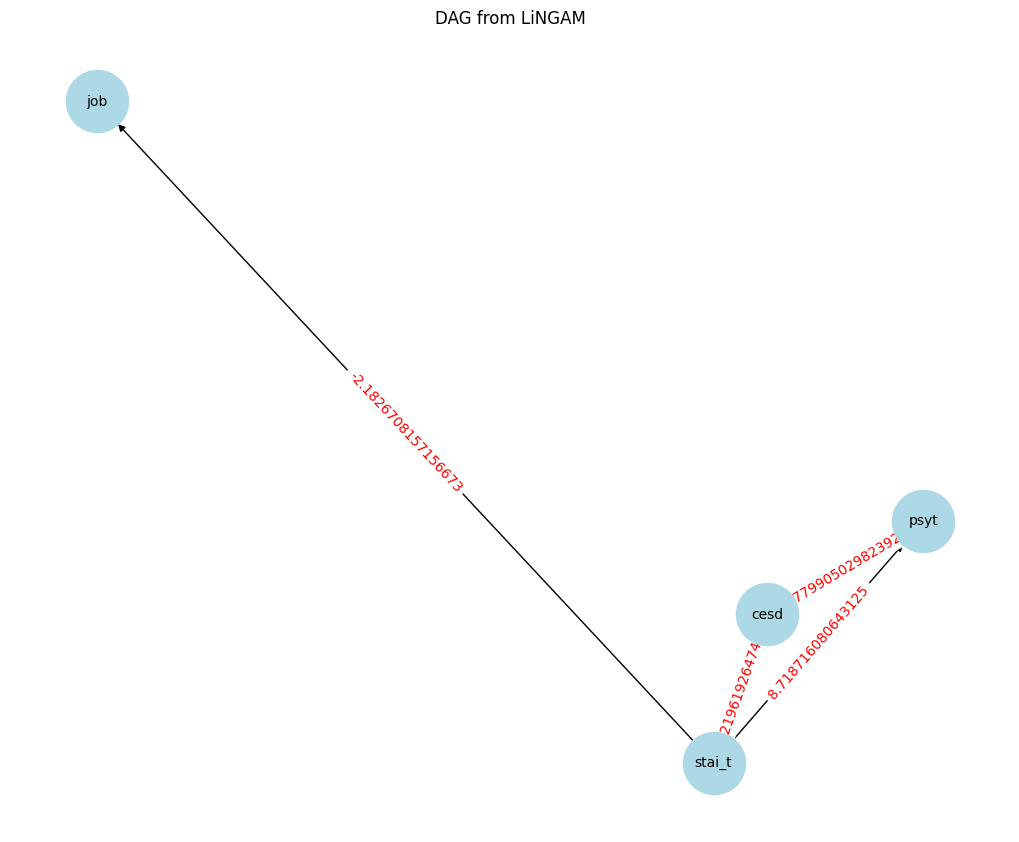

In [18]:
### Step 2: Directed Acyclic Graph (DAG) with LiNGAM ###
# Selecting relevant variables
data_subset = df[['job', 'psyt', 'cesd', 'stai_t']]

# Applying LiNGAM model
model = DirectLiNGAM()
model.fit(data_subset)
adjacency_matrix = model.adjacency_matrix_

# Visualizing DAG
G = nx.DiGraph()
nodes = data_subset.columns
G.add_nodes_from(nodes)
for i, source in enumerate(nodes):
    for j, target in enumerate(nodes):
        if adjacency_matrix[i, j] != 0:
            G.add_edge(source, target, weight=adjacency_matrix[i, j])
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("DAG from LiNGAM")
plt.show()

Grafik di atas merupakan Directed Acyclic Graph (DAG) yang menunjukkan hubungan antara variabel-variabel dalam dataset mahasiswa kedokteran terkait kesehatan mental dan pekerjaan. Berikut adalah interpretasi dari grafik tersebut:

Hubungan antara job dan stai_t:
Variabel job (status pekerjaan) memiliki arah panah menuju stai_t (skor kecemasan). Koefisien -2.1826 menunjukkan bahwa ada hubungan negatif antara pekerjaan dan kecemasan. Artinya, mahasiswa yang memiliki pekerjaan cenderung memiliki skor kecemasan (stai_t) yang lebih rendah.

Hubungan antara stai_t dan cesd:
Variabel stai_t (kecemasan) memiliki pengaruh positif terhadap cesd (skor depresi), dengan koefisien sebesar 2.1969. Ini menunjukkan bahwa mahasiswa yang memiliki skor kecemasan lebih tinggi cenderung memiliki skor depresi yang lebih tinggi.

Hubungan antara cesd dan psyt:
Variabel cesd (depresi) berpengaruh positif terhadap psyt (distres psikologis), dengan koefisien 0.7799. Hal ini menunjukkan bahwa tingkat depresi yang lebih tinggi kemungkinan berhubungan dengan distres psikologis pada mahasiswa.

Hubungan antara stai_t dan psyt:
Selain melalui depresi (cesd), variabel stai_t (kecemasan) juga memiliki pengaruh langsung terhadap psyt (distres psikologis) dengan koefisien 0.8178. Ini menunjukkan bahwa kecemasan yang lebih tinggi dapat langsung berkaitan dengan distres psikologis pada mahasiswa.

Karena variabel 'job' adalah variabel perlakuan, maka pakan dilakukan Propensity Score Matching (PSM) pada variabel 'job'. Hal ini dilakukan untuk meningkatkan ketepatan dalam mengukur dampak pekerjaan terhadap variabel-variabel psikologis dan akademis, serta untuk mengurangi kemungkinan bias yang berasal dari perbedaan karakteristik dasar antara mahasiswa yang bekerja dan yang tidak bekerja.

In [ ]:
### Step 3: Propensity Score Matching (PSM) ###
# Propensity score for `job`
psm_model_job = LogisticRegression()
df['job_ps'] = psm_model_job.fit(df[['stud_h', 'cesd', 'stai_t']], df['job']).predict_proba(df[['stud_h', 'cesd', 'stai_t']])[:,1]
treated = df[df['job'] == 1]
control = df[df['job'] == 0].sample(n=len(treated), replace=False, random_state=1)
matched_data_job = pd.concat([treated, control])


<ipython-input-18-e79df26f3ec3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['job'] == 1]['job_ps'], shade=True, color="blue", label="Treatment (job=1)")
<ipython-input-18-e79df26f3ec3>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['job'] == 0]['job_ps'], shade=True, color="red", label="Control (job=0)")


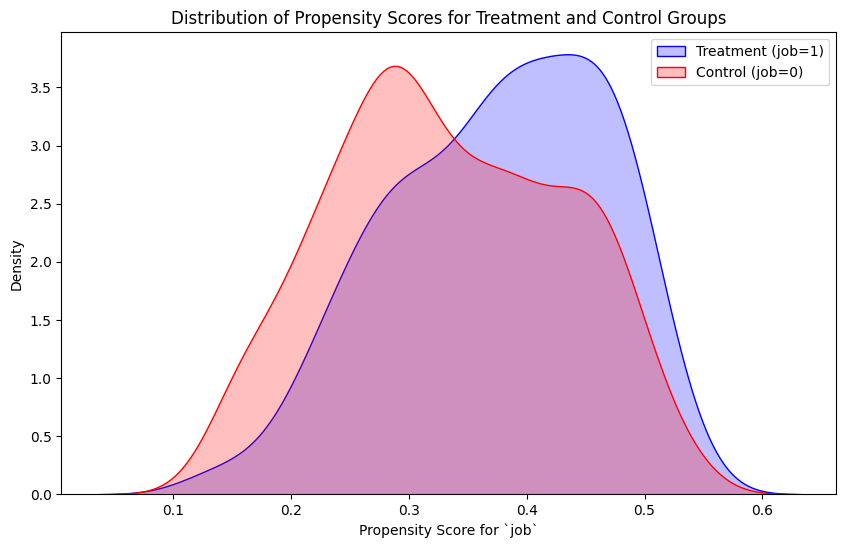

Mean values of covariates before matching:
        stud_h       cesd     stai_t
job                                 
0    27.631119  18.293706  43.290210
1    20.908197  16.740984  41.567213

Mean values of covariates after matching:
        stud_h       cesd     stai_t
job                                 
0    27.006557  17.914754  42.973770
1    20.908197  16.740984  41.567213

T-tests for covariate balance after matching:
stud_h: p-value = 1.093772510608929e-06
cesd: p-value = 0.1867710260101159
stai_t: p-value = 0.13885457103026796


In [ ]:
from scipy.stats import ttest_ind

# Plotting Propensity Score Distributions for `job`
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['job'] == 1]['job_ps'], shade=True, color="blue", label="Treatment (job=1)")
sns.kdeplot(df[df['job'] == 0]['job_ps'], shade=True, color="red", label="Control (job=0)")
plt.xlabel("Propensity Score for `job`")
plt.title("Distribution of Propensity Scores for Treatment and Control Groups")
plt.legend()
plt.show()

# Checking Balance of Covariates in Matched Data
print("Mean values of covariates before matching:")
print(df[['stud_h', 'cesd', 'stai_t']].groupby(df['job']).mean())

print("\nMean values of covariates after matching:")
print(matched_data_job[['stud_h', 'cesd', 'stai_t']].groupby(matched_data_job['job']).mean())

# T-tests for covariate balance after matching
print("\nT-tests for covariate balance after matching:")
for covariate in ['stud_h', 'cesd', 'stai_t']:
    t_stat, p_val = ttest_ind(matched_data_job[matched_data_job['job'] == 1][covariate],
                              matched_data_job[matched_data_job['job'] == 0][covariate])
    print(f"{covariate}: p-value = {p_val}")

Berdasarkan grafik distribusi propensi skor terhadap variabel 'job', dapat dilihat bahwa tumpang tindih yang signifikan antara kelompok mahasiswa yang memiliki pekerjaan (job=1) dan yang tidak memiliki pekerjaan (job=0). Ini merupakan indikasi yang baik untuk matching. Skor propensi yang serupa antara kelompok perlakuan dan kontrol akan memungkinkan perbandingan yang lebih valid antara dua kelompok ini dengan menggunakan metode matching.

Sebelum matching, terdapat perbedaan signifikan dalam nilai mean untuk beberapa variabel, terutama stud_h. Contohnya, mean stud_h untuk kelompok kontrol adalah 27.63, sementara untuk kelompok perlakuan hanya 20.91, menunjukkan ketidakseimbangan antara kedua kelompok ini dalam variabel tersebut.
Setelah matching, rata-rata dari variabel-variabel tersebut menjadi lebih seimbang, dengan perbedaan yang jauh lebih kecil antara kelompok kontrol dan perlakuan. Misalnya, rata-rata stud_h untuk kontrol mendekati nilai di kelompok perlakuan (27.01 vs. 20.91), meskipun masih terdapat sedikit perbedaan yang signifikan.

Hasil uji t menunjukkan bahwa stud_h masih memiliki perbedaan yang signifikan antara kedua kelompok setelah matching (p-value ≈ 1.09e-06). Ini menandakan bahwa, meskipun nilai mean menjadi lebih seimbang, masih ada perbedaan yang tidak sepenuhnya hilang setelah proses matching.
Di sisi lain, variabel cesd dan stai_t memiliki p-value yang tidak signifikan (p > 0.05), yang menunjukkan bahwa keduanya seimbang antara kelompok kontrol dan perlakuan setelah matching.

Proses matching berhasil meningkatkan keseimbangan antara kelompok kontrol dan perlakuan, terutama untuk variabel cesd dan stai_t.
Namun, karena stud_h masih memiliki perbedaan yang signifikan, ini bisa berarti variabel ini berpotensi untuk mempengaruhi hasil secara independen dari perlakuan job. Hal ini dapat mengindikasikan perlunya kontrol tambahan atau metode penyesuaian lebih lanjut untuk mengurangi bias dari variabel stud_h.

Selanjutnya Prospensity score juga dilakukan terhadap variabel 'psyt' karena juga melakukan variabel perlakuan. Hal ini diperlukan untuk mengurangi bias seleksi antara peserta yang mengalami psychological distress dan yang tidak. Hal ini dapat menciptakan kelompok yang lebih sebanding dan mengisolasi efek psychological distress (psyt) terhadap variabel-variabel lain dengan lebih akurat, mengurangi pengaruh dari perbedaan awal pada variabel seperti jam belajar, tingkat depresi, dan tingkat kecemasan.

In [ ]:
# Propensity score for `psyt`
psm_model_psyt = LogisticRegression()
df['psyt_ps'] = psm_model_psyt.fit(df[['stud_h', 'cesd', 'stai_t']], df['psyt']).predict_proba(df[['stud_h', 'cesd', 'stai_t']])[:,1]
treated_psyt = df[df['psyt'] == 1]
control_psyt = df[df['psyt'] == 0].sample(n=len(treated_psyt), replace=False, random_state=1)
matched_data_psyt = pd.concat([treated_psyt, control_psyt])


<ipython-input-20-470d4362abc0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['psyt'] == 1]['psyt_ps'], shade=True, color="blue", label="Treatment (psyt=1)")
<ipython-input-20-470d4362abc0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['psyt'] == 0]['psyt_ps'], shade=True, color="red", label="Control (psyt=0)")


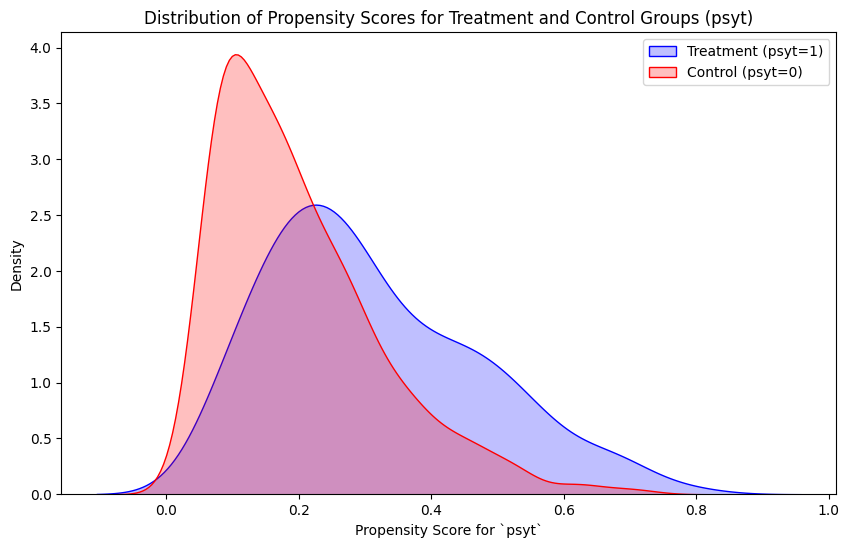

Mean values of covariates before matching:
         stud_h       cesd     stai_t
psyt                                 
0     25.566176  16.098529  40.766176
1     24.350254  23.467005  49.335025

Mean values of covariates after matching:
         stud_h       cesd     stai_t
psyt                                 
0     25.096447  16.741117  41.487310
1     24.350254  23.467005  49.335025

T-tests for covariate balance after matching:
stud_h: p-value = 0.6324470967298816
cesd: p-value = 3.1054514725490844e-09
stai_t: p-value = 5.286491325627587e-11


In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['psyt'] == 1]['psyt_ps'], shade=True, color="blue", label="Treatment (psyt=1)")
sns.kdeplot(df[df['psyt'] == 0]['psyt_ps'], shade=True, color="red", label="Control (psyt=0)")
plt.xlabel("Propensity Score for `psyt`")
plt.title("Distribution of Propensity Scores for Treatment and Control Groups (psyt)")
plt.legend()
plt.show()

print("Mean values of covariates before matching:")
print(df[['stud_h', 'cesd', 'stai_t']].groupby(df['psyt']).mean())

print("\nMean values of covariates after matching:")
print(matched_data_psyt[['stud_h', 'cesd', 'stai_t']].groupby(matched_data_psyt['psyt']).mean())


print("\nT-tests for covariate balance after matching:")
for covariate in ['stud_h', 'cesd', 'stai_t']:
    t_stat, p_val = ttest_ind(matched_data_psyt[matched_data_psyt['psyt'] == 1][covariate],
                              matched_data_psyt[matched_data_psyt['psyt'] == 0][covariate])
    print(f"{covariate}: p-value = {p_val}")


Berdasarkan grafik distribusi skor propensi untuk kelompok psyt, menunjukkan bahwa kelompok control (psyt=0) lebih condong ke nilai skor propensi yang rendah dibandingkan kelompok treatment (psyt=1). Namun, ada tumpang tindih yang cukup besar, yang menunjukkan adanya keterwakilan yang memadai dari kedua kelompok di berbagai nilai skor propensi. Ini penting untuk memastikan bahwa proses matching dapat dilakukan dengan baik.

Sebelum matching, terdapat ketidakseimbangan yang besar dalam mean dari variabel-variabel cesd dan stai_t. Misalnya, rata-rata cesd untuk psyt = 0 adalah 16.10, sedangkan untuk psyt = 1 adalah 23.47, yang merupakan perbedaan yang signifikan. Setelah matching, perbedaan pada stud_h antara kelompok kontrol dan perlakuan menjadi lebih kecil (25.10 untuk psyt = 0 dan 24.35 untuk psyt = 1), yang menunjukkan peningkatan keseimbangan. Namun, cesd dan stai_t tetap memiliki perbedaan yang cukup besar setelah matching, meskipun ada sedikit peningkatan keseimbangan.

Hasil uji t menunjukkan bahwa stud_h memiliki p-value yang tidak signifikan (p ≈ 0.63), yang menunjukkan keseimbangan yang baik antara kedua kelompok untuk variabel ini.
Namun, variabel cesd dan stai_t memiliki p-value yang sangat kecil (p ≈ 3.11e-09 untuk cesd dan p ≈ 5.29e-11 untuk stai_t), yang menunjukkan bahwa kedua variabel ini masih tidak seimbang antara kelompok kontrol dan perlakuan bahkan setelah matching.

meskipun matching membantu dalam meningkatkan keseimbangan, terutama untuk stud_h, masih ada potensi bias dalam analisis yang berkaitan dengan cesd dan stai_t.

In [ ]:
matched_data_psyt.head()

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,...,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,job_ps,psyt_ps
11,18,1,2,1,0,1,9,5,1,115,...,36,27,0.809524,5,45,15,4,26,0.445647,0.196668
13,21,2,2,1,1,0,51,2,1,95,...,37,19,0.428571,19,48,19,11,20,0.196687,0.181755
20,23,4,2,1,0,1,18,4,1,121,...,36,26,0.761905,24,34,11,12,18,0.399458,0.173342
22,22,3,2,1,1,0,30,4,1,119,...,46,26,0.785714,30,47,26,19,20,0.303189,0.284080
23,22,3,1,1,1,0,33,4,1,118,...,31,28,0.547619,12,50,15,8,22,0.285124,0.209808


Karena variabel job dan psyt adalah variable perkaluan, maka akan dilakukan analisa causal inference untuk mengetahui pengaruh variabel 'job' dan 'psyt' dengan outcome kesehatan mental.

## pengaruh variabel 'job' dan 'psyt' dengan outcome kesehatan mental.

In [ ]:
# Regresi pengaruh 'job' terhadap 'cesd'
X_job = matched_data_job[['job']]
y_cesd = matched_data_job['cesd']
X_job = sm.add_constant(X_job)  #
model_cesd_job = sm.OLS(y_cesd, X_job).fit()
print("Hasil regresi untuk pengaruh job terhadap CES-D")
print(model_cesd_job.summary())

Hasil regresi untuk pengaruh job terhadap CES-D
                            OLS Regression Results                            
Dep. Variable:                   cesd   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.747
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.187
Time:                        06:16:06   Log-Likelihood:                -2325.4
No. Observations:                 610   AIC:                             4655.
Df Residuals:                     608   BIC:                             4664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

Berdasarkan hasil regresi linear pengaruh variabel 'job' terhadap variabel 'cesd' dapat dijelaskan bahwa koefisien variabel pekerjaan adalah -1.1738, menunjukkan bahwa mahasiswa yang bekerja cenderung memiliki skor CES-D (depresi) 1.1738 poin lebih rendah dibandingkan yang tidak bekerja. Namun, pengaruh ini bersifat negatif dan kecil. Namun, dengan p-value sebesar 0.187 (lebih besar dari 0.05), pengaruh pekerjaan terhadap depresi tidak signifikan secara statistik, sehingga tidak ada bukti kuat bahwa pekerjaan memengaruhi tingkat depresi. R-squared sebesar 0.003 menunjukkan bahwa model hanya mampu menjelaskan 0.3% dari variasi CES-D, sehingga pekerjaan bukanlah faktor penjelas utama untuk tingkat depresi. Intercept sebesar 17.9148 merepresentasikan perkiraan skor CES-D rata-rata untuk mahasiswa yang tidak bekerja, menunjukkan tingkat depresi yang cukup tinggi di kelompok ini. Secara keseluruhan, hasil ini menunjukkan bahwa meskipun variabel job menunjukkan pengaruh negatif terhadap depresi, pengaruh ini tidak signifikan secara statistik.

In [ ]:
# Regresi pengaruh 'psyt' terhadap stai_t
X_psyt = matched_data_psyt[['psyt']]
y_stai_t = matched_data_psyt['stai_t']
X_psyt = sm.add_constant(X_psyt)
model_stai_t_psyt = sm.OLS(y_stai_t, X_psyt).fit()
print("\nHasil regresi untuk pengaruh psyt terhadap STAI-T")
print(model_stai_t_psyt.summary())


Hasil regresi untuk pengaruh psyt terhadap STAI-T
                            OLS Regression Results                            
Dep. Variable:                 stai_t   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     45.58
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.29e-11
Time:                        06:16:10   Log-Likelihood:                -1521.6
No. Observations:                 394   AIC:                             3047.
Df Residuals:                     392   BIC:                             3055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

Berdasarkan hasil analisis regresi, ditemukan bahwa variabel psychological distress (psyt) memiliki pengaruh yang signifikan terhadap skor State-Trait Anxiety Inventory (stai_t). Koefisien regresi untuk psyt sebesar 7.8477 menunjukkan bahwa setiap peningkatan satu unit pada psychological distress akan meningkatkan skor stai_t sebesar 7.8477 poin. Nilai p-value sebesar 0.000 untuk variabel psyt menunjukkan bahwa pengaruhnya terhadap stai_t signifikan secara statistik pada tingkat kepercayaan 95%. Hal ini menunjukkan adanya bukti kuat bahwa psychological distress berpengaruh signifikan terhadap kecemasan yang diukur melalui stai_t.

Namun, nilai R-squared sebesar 0.104 mengindikasikan bahwa model ini hanya mampu menjelaskan sekitar 10.4% dari variasi skor stai_t, sehingga pengaruh psychological distress terhadap kecemasan yang diukur masih terbatas. Walaupun begitu, nilai F-statistic sebesar 45.58 dengan probabilitas (F-statistic) sebesar 5.29e-11 menunjukkan bahwa model ini signifikan secara keseluruhan, sehingga layak digunakan dalam analisis meskipun nilai R-squared rendah.

In [ ]:
# Membuat variabel placebo
matched_data_job['placebo'] = np.random.rand(len(matched_data_job))

# Re-run regresi untuk variabel placebo
X_placebo = matched_data_job[['placebo']]
y_cesd = matched_data_job['cesd']
X_placebo = sm.add_constant(X_placebo)
model_placebo = sm.OLS(y_cesd, X_placebo).fit()
print("\nHasil regresi untuk variabel placebo terhadap CES-D")
print(model_placebo.summary())


Hasil regresi untuk variabel placebo terhadap CES-D
                            OLS Regression Results                            
Dep. Variable:                   cesd   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.285
Date:                Thu, 31 Oct 2024   Prob (F-statistic):              0.257
Time:                        06:17:07   Log-Likelihood:                -2325.7
No. Observations:                 610   AIC:                             4655.
Df Residuals:                     608   BIC:                             4664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Koefisien untuk variabel placebo adalah -1.7035 dengan nilai p sebesar 0.257. Nilai p ini jauh di atas ambang batas 0.05, yang berarti efek placebo tidak signifikan secara statistik. Dengan kata lain, variabel acak (placebo) tidak berhubungan dengan cesd, seperti yang diharapkan. R-squared model ini hanya 0.002, yang berarti model ini hanya mampu menjelaskan sekitar 0.2% dari variasi dalam skor cesd. Ini mengindikasikan bahwa variabel placebo hampir tidak memiliki kemampuan untuk menjelaskan variasi dalam tingkat depresi.

In [ ]:
# Membuat variabel placebo
matched_data_psyt['placebo'] = np.random.rand(len(matched_data_psyt))

# Re-run regresi untuk variabel placebo
X_placebo = matched_data_psyt[['placebo']]
y_cesd = matched_data_psyt['stai_t']
X_placebo = sm.add_constant(X_placebo)
model_placebo = sm.OLS(y_cesd, X_placebo).fit()
print("\nHasil regresi untuk variabel placebo terhadap stai_t")
print(model_placebo.summary())


Hasil regresi untuk variabel placebo terhadap stai_t
                            OLS Regression Results                            
Dep. Variable:                 stai_t   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1893
Date:                Sat, 02 Nov 2024   Prob (F-statistic):              0.664
Time:                        14:45:43   Log-Likelihood:                -1543.2
No. Observations:                 394   AIC:                             3090.
Df Residuals:                     392   BIC:                             3098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Hasil Regresi:

Koefisien untuk Variabel Placebo: Koefisien dari variabel placebo adalah -0.9350 dengan nilai p-value sebesar 0.664. p-value yang tinggi (lebih dari 0.05) menunjukkan bahwa variabel placebo tidak memiliki pengaruh signifikan terhadap stai_t.
Nilai R-squared: R-squared model ini adalah 0.000, yang menunjukkan bahwa variabel placebo tidak menjelaskan variabilitas dalam stai_t. Artinya, model ini tidak dapat menjelaskan atau memprediksi stai_t dengan menggunakan variabel placebo.
Keseluruhan Statistik Model: F-statistic model adalah 0.1893 dengan p-value 0.664, menunjukkan bahwa model ini secara keseluruhan tidak signifikan.
Interpretasi Hasil: Hasil ini menunjukkan bahwa variabel placebo benar-benar tidak memiliki efek terhadap variabel stai_t. Ini adalah hasil yang diharapkan karena variabel placebo hanya diciptakan secara acak tanpa hubungan kausal dengan stai_t. Karena variabel ini tidak memiliki pengaruh yang signifikan, kita bisa lebih percaya diri bahwa hasil pada model utama yang menunjukkan efek jam belajar terhadap depresi bukanlah hasil dari variabel yang kebetulan atau acak.

Kesimpulan: Pengujian placebo ini menunjukkan bahwa model kausal utama Anda memiliki kekokohan yang baik. Hasil ini meningkatkan validitas model utama Anda dan mendukung bahwa hubungan antara variabel utama (seperti jam belajar dan depresi) adalah signifikan serta tidak terjadi secara acak.